In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [5]:
def f(x):
    return 3*x**2 - 4*x + 5

In [6]:
f(3.0)

20.0

In [7]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [8]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

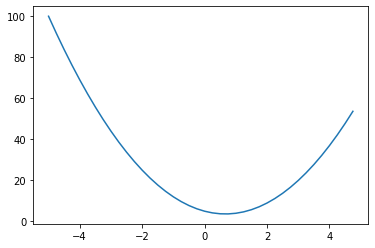

In [9]:
plt.plot(xs,ys)

In [55]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        # use _children as a new variable for the connected tissues 
        # so that we can keep all these expression graphs
        # => keep pointers about what values produce the other values

        # children stores the values from which this value was produced
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op # the op that produced this node
        self.label = label # label for dot graph
          
    def __repr__(self):
        return f"Value(data={self.data})" # similar to eval()
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '+')
        return out
    



In [56]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
# a + b # will internally call a.__add__(b)
c = Value(10.0, label='c')
e = a * b; 
e.label = 'e'
d = e + c; 
d.label = 'd'
f = Value(-2.0, label='f')
L = d * f # the output of the NN
L.label = 'L'


d = a * b + c # will internally call a.__mul__(b).__add__(c)
d._prev # to check the children of this value
d._op # to check the operation that produced this value

'+'

In [57]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


In [58]:
L = d * f
e.label


'e'

In [59]:
L.grad = 1.0
f.grad = 4.0 
d.grad = -2.0

c.grad = -2.0
e.grad = -2.0

a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0

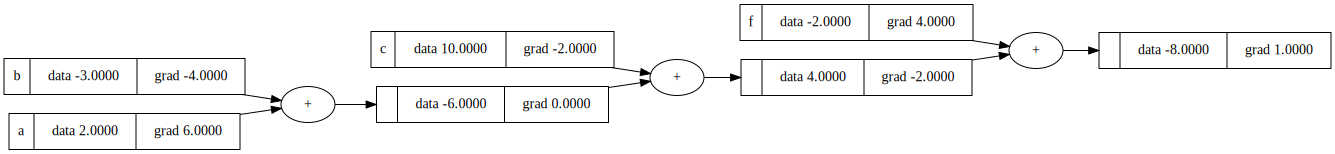

In [60]:
draw_dot(L)

In [61]:
def lol():
    # just to not mess up the global values
    h = 0.001
  
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data

    a = Value(2.0 , label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d.data += h
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2 - L1)/h)
lol()

0.0
